# micrograd exercises

1. watch the [micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0) on YouTube
2. come back and complete these exercises to level up :)

## section 1: derivatives

In [1]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos

def f(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

print(f(2, 3, 4))

6.336362190988558


In [2]:
# write the function df that returns the analytical gradient of f
# i.e. use your skills from calculus to take the derivative, then implement the formula
# if you do not calculus then feel free to ask wolframalpha, e.g.:
# https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

def gradf(a, b, c):
  grada = -3*a**2 - 0.5 * a ** (-0.5)
  gradb = 3 * cos(3*b) + 2.5 * b ** 1.5
  gradc = c**-2
  return [grada, gradb, gradc] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of 
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


In [3]:
# now estimate the gradient numerically without any calculus, using
# the approximation we used in the video.
# you should not call the function df from the last cell


def gradf_num(a, b, c, h=0.000001):
  grada = (f(a+h, b, c) - f(a, b, c))/h
  gradb = (f(a, b+h, c) - f(a, b, c))/h
  gradc = (f(a, b, c+h) - f(a, b, c))/h
  return [grada, gradb, gradc] # todo, return [df/da, df/db, df/dc]

# -----------
numerical_grad = gradf_num(2, 3, 4) # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353559348809995
OK for dim 1: expected 10.25699027111255, yours returns 10.256991666679482
OK for dim 2: expected 0.0625, yours returns 0.062499984743169534


In [4]:
# there is an alternative formula that provides a much better numerical 
# approximation to the derivative of a function.
# learn about it here: https://en.wikipedia.org/wiki/Symmetric_derivative
# implement it. confirm that for the same step size h this version gives a
# better approximation.

def gradf_num2(a, b, c, h=0.000001):
  grada = (f(a+h, b, c) - f(a-h, b, c))/(2*h)
  gradb = (f(a, b+h, c) - f(a, b-h, c))/(2*h)
  gradc = (f(a, b, c+h) - f(a, b, c-h))/(2*h)
  return [grada, gradb, gradc] # todo, return [df/da, df/db, df/dc]

# -----------
numerical_grad2 = gradf_num2(2, 3, 4) # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553391353245
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027401572
OK for dim 2: expected 0.0625, yours returns 0.06250000028629188


In [5]:
h = 0.000001
numerical_grad = gradf_num(2, 3, 4, h)
numerical_grad2 = gradf_num2(2, 3, 4, h)

for i, var in enumerate(["a", "b", "c"]):
    print(var)

    # get the absolute value difference
    one = abs(numerical_grad[dim] - ans[dim])
    two = abs(numerical_grad2[dim] - ans[dim])


    print("gradf_num", one)
    print("gradf_num2", two)

a
gradf_num 1.5256830465659732e-08
gradf_num2 2.8629187909245957e-10
b
gradf_num 1.5256830465659732e-08
gradf_num2 2.8629187909245957e-10
c
gradf_num 1.5256830465659732e-08
gradf_num2 2.8629187909245957e-10


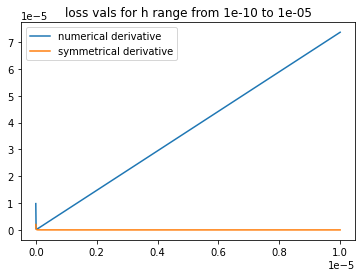

In [6]:
import numpy as np
import matplotlib.pyplot as plt
hs = np.linspace(0.0000000001, 0.00001, 1000)
numerical_grads = []
numerical_grads2 = []

for h in hs:
    # get the gradients
    numerical_grad = gradf_num(2, 3, 4, h)
    numerical_grad2 = gradf_num2(2, 3, 4, h)

    grad1_loss = 0
    grad2_loss = 0

    # get the absolute value difference
    for dim in range(3):
        grad1_loss += abs(numerical_grad[dim] - ans[dim])
        grad2_loss += abs(numerical_grad2[dim] - ans[dim])

    numerical_grads.append(grad1_loss)
    numerical_grads2.append(grad2_loss)

plt.plot(hs, numerical_grads, label="numerical derivative")
plt.plot(hs, numerical_grads2, label="symmetrical derivative")
plt.title(f"loss vals for h range from {hs[0]} to {hs[-1]}")
plt.legend()
plt.show()


## section 2: support for softmax

In [7]:
# Value class starter code, with many functions taken out
from math import exp, log

class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other): # exactly as in the video
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __radd__(self, other):
      '''Handle other + self by reformatting it as self + other'''
      return self + other  # Uses the __add__ method
  
  # ------
  # re-implement all the other functions needed for the exercises below
  # your code here
  # TODO
  # ------

  def __mul__(self, other):
      '''Multiply two Value objects and add resulting parent node to graph'''
      # if other is already a Value object, do nothing, if other is an int, for example, make it a Value
      other = other if isinstance(other, Value) else Value(other)

      # compute the forward pass - get the parent node 
      out = Value(self.data * other.data, (self, other), '*')

      def _backward():
          # out = self * other
          # self.grad = dRoot/self = dRoot/dout * dout/dself = out.grad * d/dself[self * other] = out.grad * other
          # the same can be said for other.grad
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data 
      
      # set rule for propagating grad to children
      out._backward = _backward
      return out
  
  def __rmul__(self, other):
      '''Handle other * self by reformatting it as self * other'''
      # check if can do other.__mul__(self), if not, then do self.__mul__(other)
      # this helps for case of int: a times Value: b   -->   a.__mul__(b) --> b.__mul__(a) 
      return self * other

  def __truediv__(self, other):
      '''Divide self by other and add resulting parent node to graph'''
      # implemented using pow() method with value -1
      return self * other**-1
  
  def __rtruediv__(self, other):
    '''Handle other / self by reformatting it as other * self.__pow__(-1)'''
    return other * self.__pow__(-1)  # Uses the __pow__ and __mul__ methods.

  def __pow__(self, other):
      '''Raise self to a power specified by other and add resulting parent Value to graph'''
      # assert isinstance(other, (int, float)), "only supporting int/float powers for now"

      # other = other if isinstance(other, Value) else Value(other)
      if isinstance(other, (Value)):
        other = other.data


      # compute the forward pass - get the parent node 
      out = Value(self.data**other, (self,), f'**{other}')

      def _backward():
          # out = self ** other
          # self.grad = dRoot/dself = dRoot/dout * dout/dself = out.grad * d/dself[self ** other] = out.grad * (other * self**(other-1))
          self.grad += out.grad * (other * self.data ** (other-1)) # chain the local derivative dout/dself to the rest of the product chain dRoot/dout

      # set rule for propagating grad to children
      out._backward = _backward
      return out

  def __sub__(self, other):
      '''Subtract other from self using other.__neg__() and add resulting parent node to graph'''
      return self + (-other)
  
  def __rsub__(self, other):
      '''Handle other - self by reformatting it as self.__neg__() + other'''
      return other + (-self)  # Uses the __neg__ and __add__ methods.

  def __neg__(self):
      '''Negate a Value a add resulting parent node to graph'''
      return self * -1

  def exp(self):
    '''Exponentiate a single Value (e^val) and add resulting parent node to graph'''
    # get the data from the input node
    x = self.data

    # compute the forward pass -> create the parent node
    out = Value(exp(x), (self,), 'exp')
    
    def _backward():
      # out = e^self
      # self.grad = dR/dself = dR/dout * dout/dself = out.grad * d/dself[e^self] = out.grad * e^self = out.grad * self.data
      self.grad += out.grad * self.data

    # set the rule for propagating grad to child
    out._backward = _backward
    
    return out

  def log(self):
    '''Take the natural logarithm of a single value and add resulting parent node to graph'''
    # get the data from the input node
    x = self.data

    # compute the forward pass -> create the parent node
    out = Value(log(x), (self,), 'log')
    
    def _backward():
      # out = log(self)  (natural log)
      # self.grad = dR/dself = dR/dout * dout/dself = out.grad * d/dself(log(self)) = out.grad * 1/self
      self.grad += out.grad * 1/x
    out._backward = _backward
    
    return out






  def backward(self): # exactly as in video  
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [8]:
vals = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
sum(vals)

Value(data=2.0)

In [9]:
# from math import exp, log

# for val in vals:
#     print("val:", val.data)
#     print(exp(val.data))
#     print(val.exp().data)

# for val in vals:
#     print("val:", val.data)
#     print(log(val.data))
#     print(val.log().data)

In [10]:
def softmax(logits):
  counts = [exp(logit) for logit in logits]  # list of Values.exp()
  denominator = sum(counts)                   # Value
  out = [c / denominator for c in counts]     # list of Value.exp() / Value
  return out

logits = [0, 3, -2, 1]
probs = softmax(logits)
print(probs)

loss = -log(probs[3])
print(loss)

[0.04177257051535045, 0.839024507462532, 0.005653302662216329, 0.11354961935990121]
2.1755153626167147


In [11]:
# without referencing our code/video __too__ much, make this cell work
# you'll have to implement (in some cases re-implemented) a number of functions
# of the Value object, similar to what we've seen in the video.
# instead of the squared error loss this implements the negative log likelihood
# loss, which is very often used in classification.

# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]  # list of Values.exp()
  denominator = sum(counts)                   # Value
  out = [c / denominator for c in counts]     # list of Value.exp() / Value
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)

# print(probs)

loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data)

ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")


2.1755153626167147
WRONG! for dim 0: expected 0.041772570515350445, yours returns 0.0
WRONG! for dim 1: expected 0.8390245074625319, yours returns 0.12531771154605134
WRONG! for dim 2: expected 0.005653302662216329, yours returns -0.08354514103070089
WRONG! for dim 3: expected -0.8864503806400986, yours returns -0.32610687065609184


In [12]:
# verify the gradient using the torch library
# torch should give you the exact same gradient
import torch
